# Interesting Pairs: AntennaObserving
The examples below were manually extracted in July, 2017. The generated datasets are available, for invited users, at:

* https://drive.google.com/drive/folders/0B-gHVAUxz8rBd1RPblNxdHpwZjg?usp=sharing

# File contents

## All events from a pair
A file with name as below, is composed of:
    
`CaseAntennaObserving-ALL-577-596.json`

Case | Color A | Color B | Contents 
---- | ------- | ------- | --------
CaseAntennaObserving | 577 | 596 | Single set with all for pair (A,B), ALL cases mixed up.

The content of the file is in native JSON format:
```
[16789, 19404, 16924]
```

## Separated events by instance
Inside there is a directory called `timestamp`. It contains a similar name convention but separated by cases, identified by the timestamp of the first event in the *case sequence* (not first in pairs). This allows to compare cases of different pairs, if needed.

`timestamp/CaseAntennaObserving-577-596.json`

Case | Color A | Color B | Contents 
---- | ------- | ------- | --------
CaseAntennaObserving | 577 | 596 | Dictionary with multiple set of delays, with key=TIMESTAMP (milliseconds from UNIX Epoch)

In this case, there are 3 cases with just 1 delay each.
```
{
  "1499760795544": [16789], 
  "1499262324610": [19404], 
  "1499785006936": [16924]
}
```




# Dataset
Below are some metrics for colors and pairs for CaseAntennaObserving 

In [1]:
from src import *
from src.models.AlmaClasses import *

palette = PaletteFileDB(
    filename='../data/processed/colors-almaAntenna.pkl', 
    colorFunction=paintedForAlmaAntennas )

db = DelaysFileDB( 
    caseName="CaseAntennaObserving", 
    path= '../' + config.FILEPATH_DB + "/delays")  

In [2]:
len(db.unique_colors())

222

In [3]:
db.total_pairs()

7849

In [4]:
db.total_cases()

1820

# Analysis for Manually Selected Pairs
Below is the code use to perform each analysis.
* Set is cropped to 100 elements for brevity. 
* Values are sorted for better readability. They are unordered by nature.

In [5]:
from pandas import Series
from matplotlib import pyplot
import numpy as np

def perform_analysis_on( a, b, c ):
    print "--- %s ---" % (c)
    print
    print "C_%s: %s" % (a, palette.getColors()[a])
    print
    print "C_%s: %s" % (b, palette.getColors()[b])
    print
    delay = sorted(db.getDelays(a,b), reverse=True)
    SHOW=100
    if len(delay) < SHOW:
        print delay
    else:
        print delay[:int(SHOW/2)], "... (%s ommited) ..." % (len(delay) - SHOW) , delay[-int(SHOW/2):]
    print
    
    print "1) Raw serie:"
    serie = Series(delay)
    pyplot.plot(serie)
    pyplot.show()
    print(serie.describe())
    print
    
    CROP=0.8
    print "2) Cropping the serie: (%s%% of middle points only)" % (CROP*100)
    serie3 = serie[ int(len(serie)*( (1-CROP)/2 )+0.5) : int(len(serie)*( 1-(1-CROP)/2 )-0.5) ]
    pyplot.plot( serie3 )
    pyplot.show()
    print(serie3.describe())    
    print 


    print "3) Log on time graph of the serie"
    serie2 = np.log(serie + 1)
    pyplot.plot(serie2)
    pyplot.show()
    print(serie2.describe())
    print 


## Few cases, many pairs found

--- (9%) ---

C_537: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Receiver band was already locked at ${N}

C_538: [CONTROL/${ANT}/cppContainer-GL - void PositionStreamConsumer::processData(Control::MountStatusData)] At ${N}:${N}:${N} got the last needed data with a timestamp of ${N}:${N}:${N}. The delay is ${N} seconds.

[205575, 79620, 66241, 66235, 66235, 66234, 66228, 66220, 66217, 66217, 66215, 66213, 66205, 66202, 66197, 66197, 66194, 66190, 66187, 66186, 66183, 66171, 66169, 66168, 66167, 66166, 66163, 66159, 66157, 66155, 66154, 66153, 66150, 66149, 66138, 66122, 66120, 66113, 66106, 66106, 66099, 66095, 66093, 66091, 66090, 66089, 66088, 66086, 66067, 66062] ... (231 ommited) ... [15467, 15467, 15466, 15466, 15466, 15466, 15465, 15464, 15464, 15464, 15463, 15463, 15463, 15461, 15461, 15461, 15459, 15459, 15458, 15457, 15457, 15456, 15456, 15456, 15455, 15455, 15454, 15453, 15452, 15452, 15452, 15450, 154

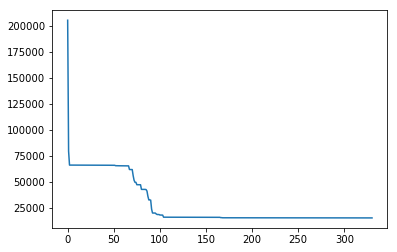

count       331.000000
mean      28716.564955
std       22963.527732
min       15425.000000
25%       15486.500000
50%       15992.000000
75%       42862.000000
max      205575.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


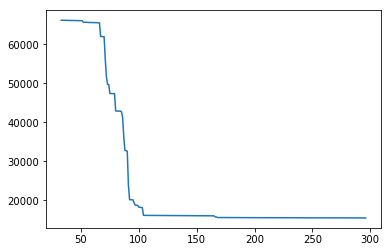

count      264.000000
mean     25162.250000
std      18218.223507
min      15461.000000
25%      15499.750000
50%      15994.500000
75%      18685.750000
max      66149.000000
dtype: float64

3) Log on time graph of the serie


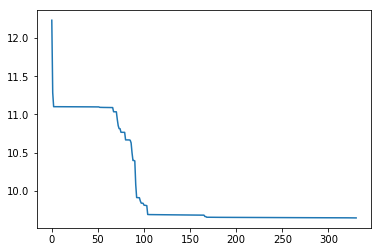

count    331.000000
mean      10.040033
std        0.615967
min        9.643810
25%        9.647789
50%        9.679906
75%       10.665764
max       12.233571
dtype: float64



In [6]:
perform_analysis_on(537, 538, '(9%)')

### Non stable candidate
The case below seems a good example of non stable behavior. The values obtained from setting LOtwoBBpr_B to setting LOtwoBBpr_A don't give me useful information for profiling typical times.

--- (5%) ---

C_576: [CONTROL/${ANT}/LOtwoBBpr_B - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. Two LO offsetting will be used Retuning as this is diferent from the current state at this time

C_575: [CONTROL/${ANT}/LOtwoBBpr_A - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. Two LO offsetting will be used Retuning as this is diferent from the current state at this time

[879666, 879666, 879665, 772452, 772452, 772451, 772450, 575958, 575958, 575545, 575545, 575545, 565450, 565450, 565450, 564175, 564174, 564174, 564173, 564173, 560877, 560876, 560876, 549891, 549890, 549890, 549889, 549555, 549555, 549554, 549554, 549554, 549554, 549554, 548118, 548117, 54811

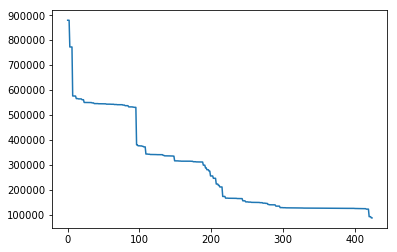

count       425.000000
mean     283406.112941
std      176191.591765
min       86867.000000
25%      126985.000000
50%      211009.000000
75%      371795.000000
max      879666.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


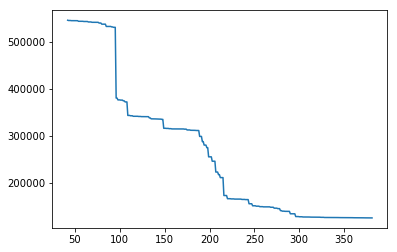

count       340.000000
mean     264830.920588
std      146247.581681
min      125357.000000
25%      128239.000000
50%      214177.500000
75%      340544.000000
max      545341.000000
dtype: float64

3) Log on time graph of the serie


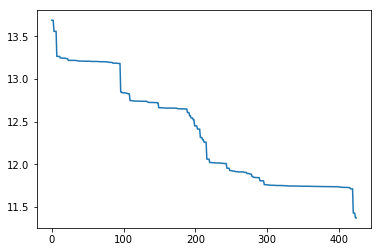

count    425.000000
mean      12.369468
std        0.604348
min       11.372145
25%       11.751832
50%       12.259661
75%       12.826101
max       13.687299
dtype: float64



In [7]:
perform_analysis_on(576, 575, '(5%)')

## Many pairs per case

--- 115 cases (74%) with 696 delays in total ---

C_560: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ijc=${N},ij${N}=${N},ij${N}=${N}

C_559: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ij=${N},my=${N},ny=${N},ij${N}=${N}

[2168977, 2168928, 2168805, 2086732, 2086725, 2086724, 2086670, 2038929, 2038868, 2038859, 2038847, 2033190, 2033161, 2033155, 2033150, 2033118, 2015519, 2015512, 2015388, 2015379, 2003790, 2003645, 2003590, 2003535, 2003505, 1972306, 1972067, 1972059, 1972013, 1972003, 1971944, 1951075, 1951052, 1950942, 1929784, 1929730, 1929719, 1929675, 1929674, 1929655, 1929613, 1903559, 1903528, 1903455, 1903316, 1137174, 1137095, 1137051, 1037501, 1037451] ... (7784 ommited) ... [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

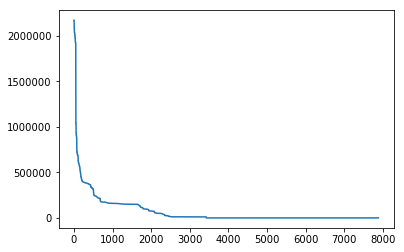

count    7.884000e+03
mean     7.162506e+04
std      1.911485e+05
min     -1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      7.619925e+04
max      2.168977e+06
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


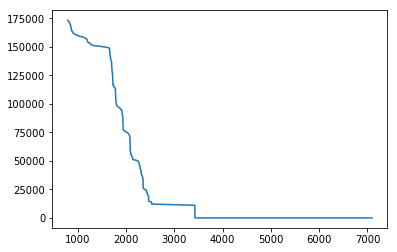

count      6307.000000
mean      32328.793246
std       55795.902434
min           0.000000
25%           1.000000
50%           1.000000
75%       25438.500000
max      173237.000000
dtype: float64

3) Log on time graph of the serie


/Users/jgil/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


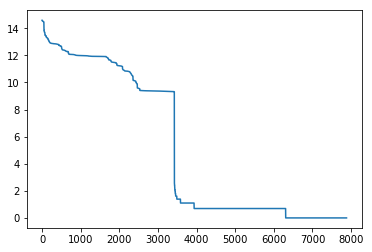

count    7884.000000
mean            -inf
std              NaN
min             -inf
25%         0.693147
50%         0.693147
75%        11.241120
max        14.589767
dtype: float64



In [8]:
perform_analysis_on(560, 559, '115 cases (74%) with 696 delays in total')

--- 151 cases (97%) with 429 delays in total ---

C_535: [CONTROL/${ANT}/FrontEnd/IFSwitch - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_A)

C_536: [CONTROL/${ANT}/FrontEnd/IFSwitch - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)

[214, 85, 49, 46, 41, 41, 40, 40, 40, 40, 39, 39, 38, 37, 37, 36, 36, 36, 36, 36, 35, 34, 34, 34, 33, 33, 33, 32, 32, 32, 32, 32, 31, 31, 31, 30, 29, 28, 28, 28, 27, 27, 27, 26, 26, 26, 26, 25, 25, 25] ... (4678 ommited) ... [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

1) Raw serie:


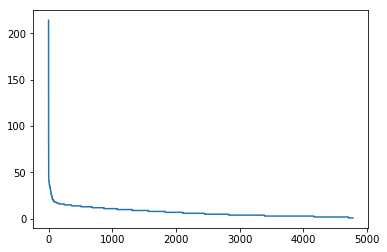

count    4778.000000
mean        7.178317
std         6.034547
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max       214.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


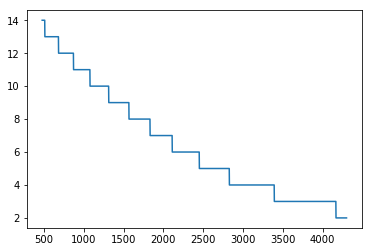

count    3821.000000
mean        6.465323
std         3.267428
min         2.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        14.000000
dtype: float64

3) Log on time graph of the serie


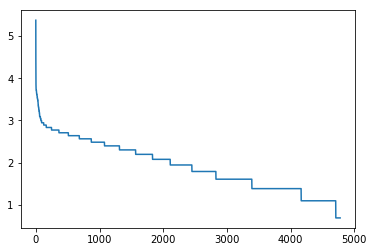

count    4778.000000
mean        1.925016
std         0.582447
min         0.693147
25%         1.386294
50%         1.945910
75%         2.397895
max         5.370638
dtype: float64



In [9]:
perform_analysis_on(535, 536, '151 cases (97%) with 429 delays in total')

--- 28 instances (18%) with 102 delays in total ---

C_556: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Setting band ${N} park frequency to ${N}

C_393: [CONTROL/${ANT}/FrontEnd/WCA${N} - SetFrequency] WCA Frequency set to: ${N}

[29, 29, 28, 28, 27, 27, 26, 24, 22, 20, 20, 19, 18, 18, 16, 16, 16, 15, 15, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9] ... (2262 ommited) ... [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

1) Raw serie:


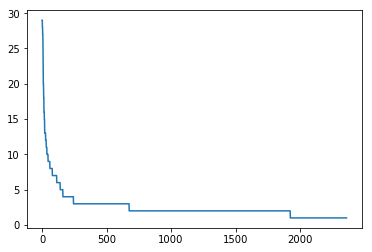

count    2362.000000
mean        2.568586
std         2.403706
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        29.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


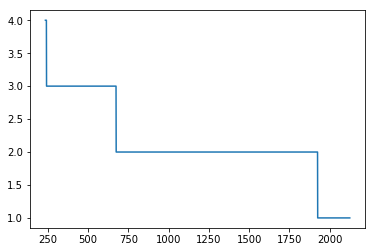

count    1889.000000
mean        2.130228
std         0.576722
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
dtype: float64

3) Log on time graph of the serie


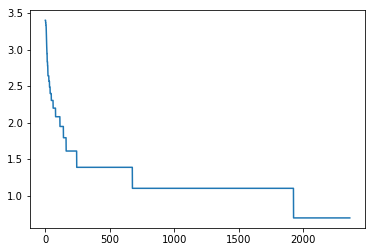

count    2362.000000
mean        1.172209
std         0.386848
min         0.693147
25%         1.098612
50%         1.098612
75%         1.386294
max         3.401197
dtype: float64



In [10]:
perform_analysis_on(556, 393, '28 instances (18%) with 102 delays in total')

--- Almost 8 delays per case (avg) however appears in 24% of the cases ---

C_559: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ij=${N},my=${N},ny=${N},ij${N}=${N}

C_561: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} Initial Guess u${N} = ${N}[V]

[8, 5, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] ... (3804 ommited) ... [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1) Raw serie:


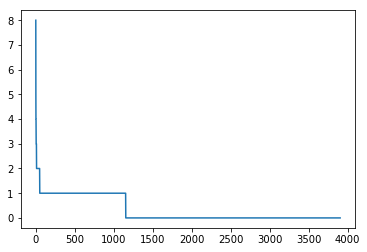

count    3904.000000
mean        0.312756
std         0.518953
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


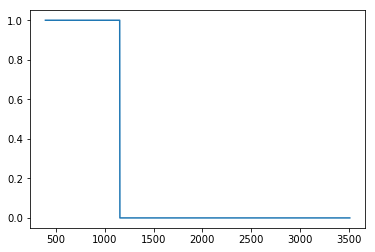

count    3123.000000
mean        0.244316
std         0.429750
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

3) Log on time graph of the serie


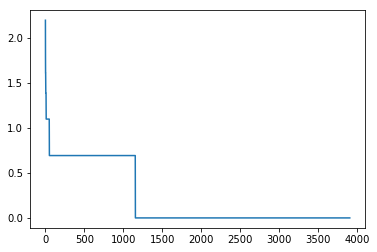

count    3904.000000
mean        0.210995
std         0.331323
min         0.000000
25%         0.000000
50%         0.000000
75%         0.693147
max         2.197225
dtype: float64



In [11]:
perform_analysis_on(559, 561, 'Almost 8 delays per case (avg) however appears in 24% of the cases')

--- 16% of the cases, 2 delays / case ---

C_393: [CONTROL/${ANT}/FrontEnd/WCA${N} - SetFrequency] WCA Frequency set to: ${N}

C_559: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ij=${N},my=${N},ny=${N},ij${N}=${N}

[3304, 1733, 1664, 1589, 1571, 1537, 1532, 1518, 1497, 1478, 1475, 1472, 1468, 1455, 1439, 1415, 1403, 1394, 1374, 1362, 1357, 1344, 1338, 1326, 1326, 1324, 1321, 1313, 1290, 1282, 1276, 1271, 1268, 1265, 1264, 1261, 1259, 1257, 1256, 1255, 1255, 1254, 1253, 1249, 1248, 1245, 1240, 1233, 1226, 1226] ... (411 ommited) ... [732, 731, 730, 730, 730, 729, 728, 712, 699, 685, 684, 683, 682, 682, 678, 678, 677, 677, 676, 676, 674, 673, 672, 672, 671, 671, 668, 667, 647, 621, 618, 615, 614, 613, 613, 613, 612, 609, 607, 569, 555, 552, 552, 551, 549, 549, 547, 457, 439, 435]

1) Raw serie:


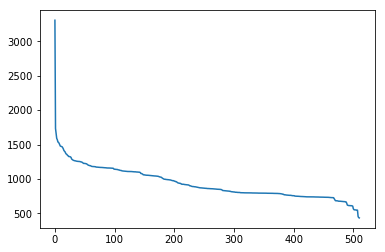

count     511.000000
mean      937.684932
std       241.293444
min       435.000000
25%       778.000000
50%       862.000000
75%      1108.000000
max      3304.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


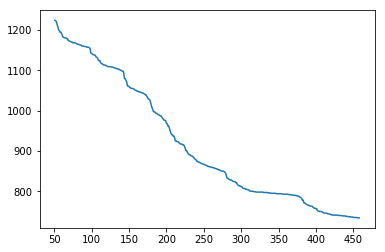

count     408.000000
mean      918.137255
std       152.750043
min       734.000000
25%       793.000000
50%       863.000000
75%      1055.500000
max      1224.000000
dtype: float64

3) Log on time graph of the serie


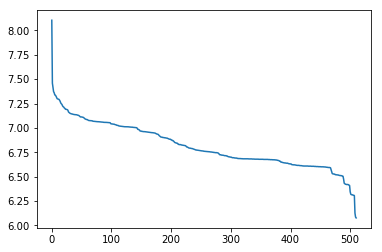

count    511.000000
mean       6.815978
std        0.234392
min        6.077642
25%        6.658011
50%        6.760415
75%        7.011214
max        8.103192
dtype: float64



In [12]:
perform_analysis_on(393, 559, '16% of the cases, 2 delays / case')

## One delay per case

--- 155 instances (100%) with 155 delays in total ---

C_505: [CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING

C_513: [CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.

[4510, 4491, 4482, 4077, 4024, 3950, 3849, 2817, 2787, 2756, 2755, 2750, 2746, 2730, 2728, 2728, 2723, 2715, 2712, 2710, 2710, 2709, 2708, 2706, 2705, 2704, 2697, 2693, 2690, 2684, 2680, 2668, 2667, 2660, 2659, 2659, 2656, 2655, 2653, 2647, 2646, 2644, 2644, 2641, 2639, 2639, 2638, 2631, 2629, 2628] ... (1612 ommited) ... [42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 38, 37, 37, 37, 37, 36, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 32, 32, 30, 30, 30, 30, 29]

1) Raw serie:


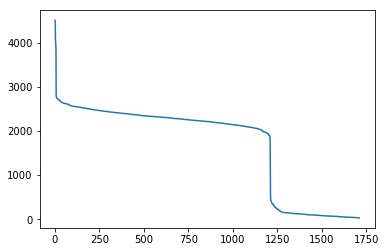

count    1712.000000
mean     1676.291472
std      1024.929741
min        29.000000
25%       153.000000
50%      2214.000000
75%      2377.250000
max      4510.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


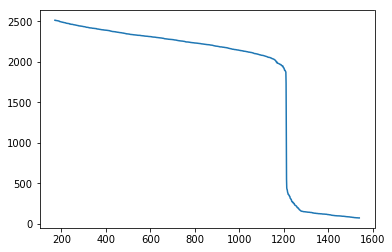

count    1369.000000
mean     1757.327977
std       916.745422
min        72.000000
25%      1938.000000
50%      2214.000000
75%      2339.000000
max      2515.000000
dtype: float64

3) Log on time graph of the serie


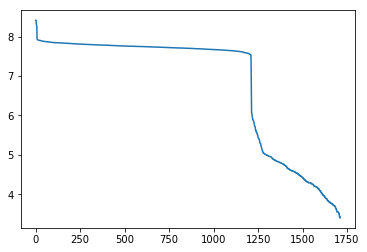

count    1712.000000
mean        6.810035
std         1.493027
min         3.401197
25%         5.036953
50%         7.703008
75%         7.774120
max         8.414274
dtype: float64



In [13]:
perform_analysis_on(505, 513, '155 instances (100%) with 155 delays in total')

--- 155 instances (100%) with 155 delays in total ---

C_483: [maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

C_513: [CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.

[329128, 326599, 326566, 326456, 49068, 49026, 48935, 48880, 46455, 46418, 46411, 46363, 46306, 46256, 46229, 46150, 46140, 46093, 46018, 44483, 44417, 44176, 43060, 42139, 41393, 41308, 41285, 40930, 40691, 40576, 40534, 40410, 40061, 40045, 40011, 40005, 39980, 38728, 38628, 38622, 38603, 36536, 35180, 35156, 35103, 34758, 34730, 34680, 34623, 34553] ... (1627 ommited) ... [11677, 11673, 11666, 11656, 11620, 11455, 11442, 11406, 11369, 11363, 11219, 11172, 11169, 11086, 11069, 10972, 10945, 10925, 10917, 10800, 10776, 10751, 10585, 10380, 10317, 10200, 10191, 10045, 9831, 9769, 9756, 9732, 9721, 9660, 9659, 9612, 9610, 9549, 9449, 9425, 9400, 9383, 9378, 9372, 9257, 9214, 9193, 9139, 9093, 8927]

1) Raw serie:


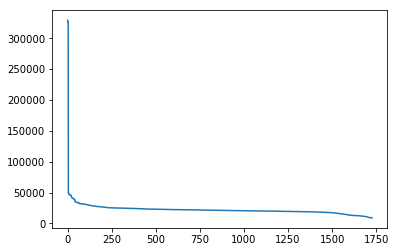

count      1727.000000
mean      22340.242617
std       15689.387093
min        8927.000000
25%       19234.000000
50%       21175.000000
75%       23532.000000
max      329128.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


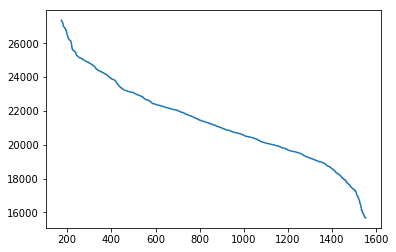

count     1380.000000
mean     21346.908696
std       2384.438793
min      15669.000000
25%      19657.750000
50%      21178.000000
75%      22951.500000
max      27363.000000
dtype: float64

3) Log on time graph of the serie


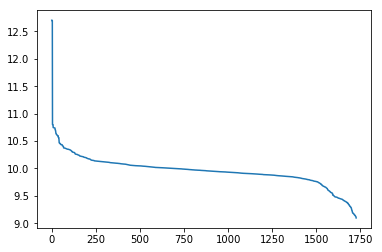

count    1727.000000
mean        9.957343
std         0.283535
min         9.096948
25%         9.864487
50%         9.960624
75%        10.066159
max        12.704205
dtype: float64



In [14]:
perform_analysis_on(483, 513, '155 instances (100%) with 155 delays in total')

--- 133 instances (85%) with 133 delays in total ---

C_492: [CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: OPERATIONAL -> DESTROYING

C_493: [CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: DESTROYING -> DEFUNCT

[6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] ... (1502 ommited) ... [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1) Raw serie:


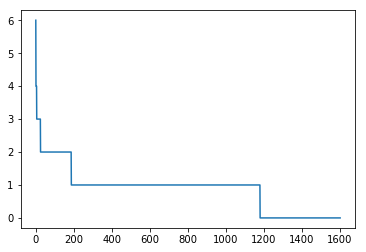

count    1602.000000
mean        0.873283
std         0.660889
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         6.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


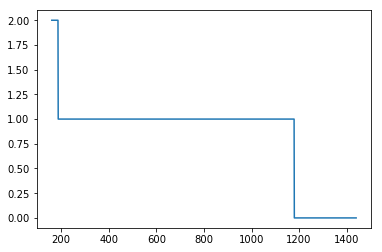

count    1281.000000
mean        0.817330
std         0.437728
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
dtype: float64

3) Log on time graph of the serie


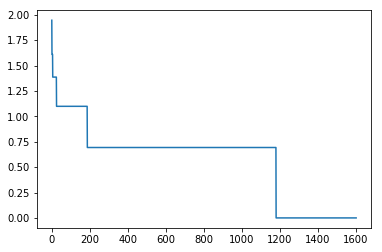

count    1602.000000
mean        0.563283
std         0.368077
min         0.000000
25%         0.000000
50%         0.693147
75%         0.693147
max         1.945910
dtype: float64



In [15]:
perform_analysis_on(492, 493, '133 instances (85%) with 133 delays in total')

--- Near events ---

C_483: [maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

C_511: [CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)

[326608, 326499, 326495, 326412, 46720, 46616, 46613, 46607, 44235, 44212, 44111, 44109, 44103, 44098, 44097, 44087, 43788, 43788, 43785, 43781, 42207, 42083, 42076, 40862, 40861, 39264, 39146, 39142, 38220, 38219, 38217, 38191, 37818, 37704, 37701, 37700, 37696, 36619, 36606, 36497, 36494, 36479, 32951, 32841, 32827, 32825, 32825, 32408, 32265, 32264] ... (1612 ommited) ... [9982, 9979, 9930, 9903, 9875, 9867, 9843, 9842, 9822, 9794, 9786, 9768, 9764, 9757, 9736, 9729, 9708, 9707, 9683, 9636, 9633, 9583, 9582, 9580, 9579, 9542, 9516, 9492, 9455, 9412, 9393, 9356, 9355, 9346, 9345, 9312, 9240, 9227, 9215, 9186, 9160, 9119, 9108, 9105, 9059, 8956, 8892, 8884, 8828, 8787]

1) Raw serie:


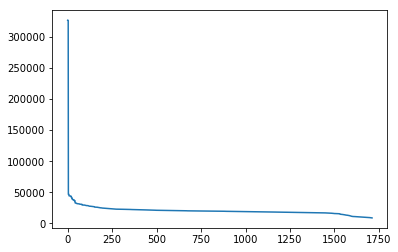

count      1712.000000
mean      20708.904206
std       15732.331164
min        8787.000000
25%       17667.000000
50%       19628.000000
75%       21758.000000
max      326608.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


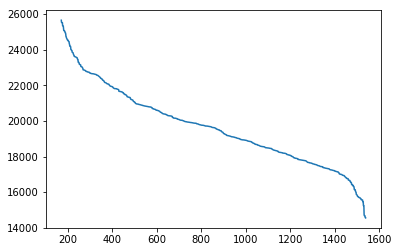

count     1369.000000
mean     19675.959094
std       2149.453064
min      14553.000000
25%      18080.000000
50%      19628.000000
75%      20943.000000
max      25650.000000
dtype: float64

3) Log on time graph of the serie


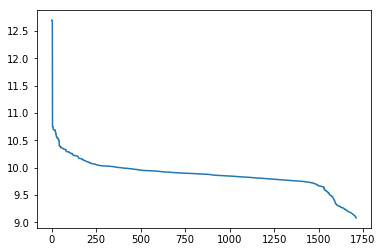

count    1712.000000
mean        9.876135
std         0.294554
min         9.081142
25%         9.779510
50%         9.884763
75%         9.987783
max        12.696519
dtype: float64



In [16]:
perform_analysis_on(483, 511, "Near events")

## One delay per case, but in a few cases only

--- 60 instances (38%) with 60 delays in total ---

C_491: [CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/WVR)

C_525: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::selectBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} has been selected

[205663, 205660, 205658, 205645, 205643, 205631, 168349, 143743, 143739, 143737, 143735, 143734, 143733, 143726, 143721, 132902, 132896, 132887, 131941, 126295, 126290, 126290, 126288, 126278, 126271, 126259, 125513, 123345, 123335, 123334, 123321, 122106, 122104, 122101, 122094, 122089, 122085, 122077, 122064, 120869, 116041, 116039, 116034, 115068, 112891, 112880, 112865, 112398, 112397, 112390] ... (556 ommited) ... [40627, 40405, 40403, 39778, 39070, 38665, 37968, 37407, 37012, 36849, 36712, 36319, 35929, 35914, 35912, 35902, 35884, 35879, 35836, 35764, 35702, 35657, 33803, 33691, 33689, 33638, 33636, 33599, 33589, 33582, 33151, 33146, 33142, 33138, 32261, 29361, 28080, 28074

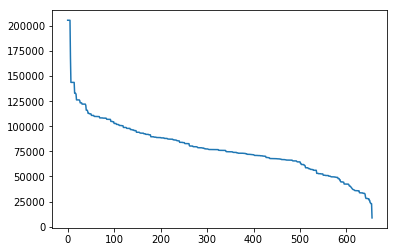

count       656.000000
mean      78465.265244
std       27125.364541
min        8682.000000
25%       65472.000000
50%       76020.500000
75%       92672.250000
max      205663.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


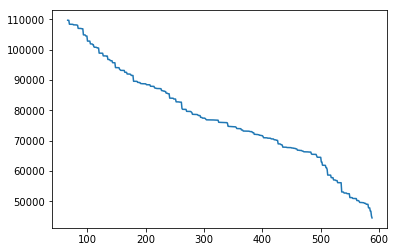

count       523.000000
mean      77477.560229
std       15804.001804
min       44545.000000
25%       67311.500000
50%       76022.000000
75%       88739.500000
max      109667.000000
dtype: float64

3) Log on time graph of the serie


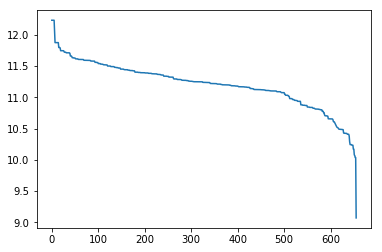

count    656.000000
mean      11.208129
std        0.367757
min        9.069122
25%       11.089393
50%       11.238771
75%       11.436831
max       12.233999
dtype: float64



In [17]:
perform_analysis_on(491, 525, '60 instances (38%) with 60 delays in total')

--- 81 instances (52%) with 81 delays in total ---

C_513: [CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.

C_408: [CONTROL/${ANT}/LOtwoBBpr_D - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. No LO offsetting will be used Retuning as this is diferent from the current state at this time

[1101421, 1101239, 1101179, 899611, 899600, 899401, 899397, 641791, 641723, 641694, 641631, 641555, 598353, 595989, 595932, 595860, 587363, 587354, 585069, 584898, 584877, 584875, 584838, 584790, 584757, 578781, 576714, 576694, 576690, 576589, 573332, 573135, 573109, 566532, 566502, 566409, 566311, 186803, 184903, 184835, 184828, 184789, 184766, 139043, 137106, 136936, 136918, 126468, 126376, 124416] ... (653 ommited) ... [13329, 13225, 13201, 13183, 13160, 13156, 13144, 13102, 13066, 12972, 12879, 12835, 12743, 

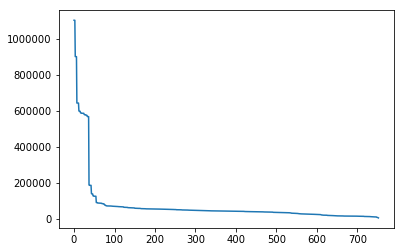

count    7.530000e+02
mean     7.300275e+04
std      1.416910e+05
min      3.891000e+03
25%      2.616600e+04
50%      4.179500e+04
75%      5.374500e+04
max      1.101421e+06
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


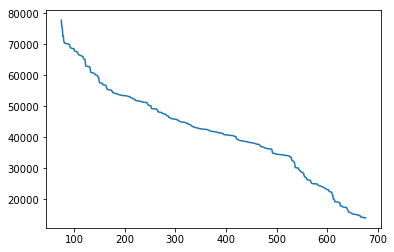

count      602.000000
mean     41632.385382
std      14591.371364
min      13971.000000
25%      33854.250000
50%      41823.500000
75%      51756.750000
max      77741.000000
dtype: float64

3) Log on time graph of the serie


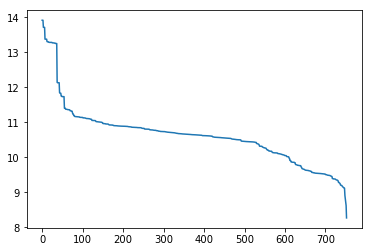

count    753.000000
mean      10.633179
std        0.855597
min        8.266678
25%       10.172254
50%       10.640556
75%       10.892025
max       13.912113
dtype: float64



In [18]:
perform_analysis_on(513, 408, '81 instances (52%) with 81 delays in total')

## Emergent Behavior / Stable Series

### ACD and FrontEnd emerging behavior!
There is no obvious relationship between those two events because ACD and FrontEnd are different hardware, maybe something at higher level calls them in serial way. Also, "Receiver band was already locked" means that in some previous case a band was sent to this frequency, but this as nothing to do with ACD in its task "Parking the Calibration Device"

It ranges from 188 ms in the worst case to 1 ms, with less than 10 outliers of 31s (almost flat) that should be some kind of error in between.

--- Greater delay count, however it happens only on 14% of the cases ---

C_514: [CONTROL/${ANT}/FrontEnd/ACD - void ACDImpl::setCalibrationDeviceBandInternal(CalibrationDeviceMod::CalibrationDevice, ReceiverBandMod::ReceiverBand)] Parking the Calibration Device

C_537: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Receiver band was already locked at ${N}

[31451, 31450, 31450, 31382, 31382, 31381, 188, 187, 187, 187, 187, 187, 186, 173, 173, 172, 172, 172, 171, 171, 162, 153, 153, 153, 153, 153, 152, 152, 152, 152, 151, 151, 151, 149, 148, 144, 141, 141, 140, 138, 138, 138, 138, 138, 137, 135, 135, 135, 135, 134] ... (8941 ommited) ... [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1]

1) Raw serie:


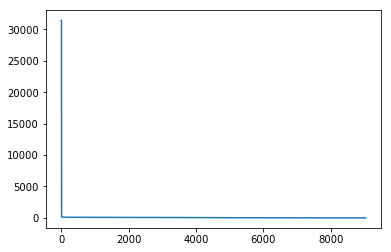

count     9041.000000
mean        67.199535
std        808.564149
min          1.000000
25%         15.000000
50%         41.000000
75%         77.000000
max      31451.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


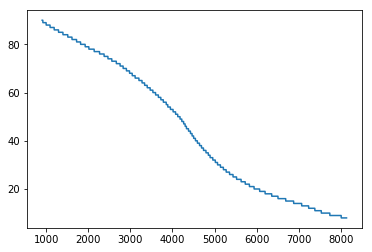

count    7232.000000
mean       44.631084
std        27.337713
min         8.000000
25%        18.000000
50%        41.000000
75%        72.000000
max        90.000000
dtype: float64

3) Log on time graph of the serie


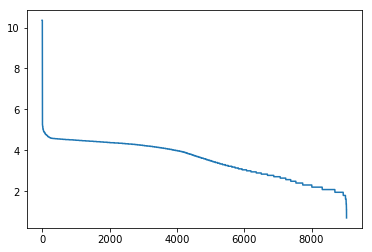

count    9041.000000
mean        3.537670
std         0.898673
min         0.693147
25%         2.772589
50%         3.737670
75%         4.356709
max        10.356218
dtype: float64



In [19]:
perform_analysis_on(514, 537, 'Greater delay count, however it happens only on 14% of the cases')

### Frontend (WCA) and IFProc loading
Times seems pretty stable around 1200 ms, +-400ms. But I see no direct relationship between those 2 different hardware components.

--- Frontend (WCA) and IFProc loading ---

C_393: [CONTROL/${ANT}/FrontEnd/WCA${N} - SetFrequency] WCA Frequency set to: ${N}

C_535: [CONTROL/${ANT}/FrontEnd/IFSwitch - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_A)

[1924, 1537, 1536, 1535, 1534, 1526, 1526, 1526, 1525, 1523, 1521, 1520, 1508, 1508, 1506, 1500, 1495, 1494, 1494, 1493, 1492, 1492, 1487, 1484, 1475, 1435, 1433, 1432, 1431, 1430, 1429, 1429, 1429, 1333, 1330, 1330, 1329, 1328, 1317, 1317, 1313, 1300, 1286, 1262, 1262, 1110, 1110, 1110, 1110, 1110] ... (23 ommited) ... [1053, 1053, 1053, 1053, 1053, 1048, 1046, 1044, 1044, 1044, 1044, 1044, 1042, 1041, 1041, 1041, 1040, 1034, 1033, 1033, 1026, 1015, 1015, 1014, 1014, 1013, 1013, 1013, 1011, 1003, 997, 997, 996, 995, 993, 989, 988, 985, 985, 983, 977, 977, 976, 976, 956, 956, 955, 953, 868, 762]

1) Raw serie:


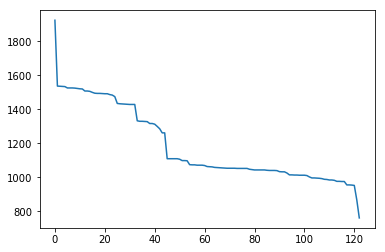

count     123.00000
mean     1184.98374
std       218.72608
min       762.00000
25%      1033.00000
50%      1064.00000
75%      1429.00000
max      1924.00000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


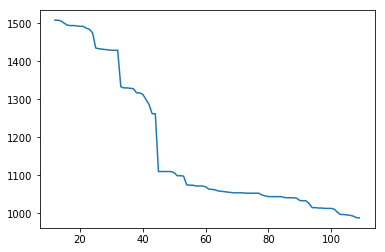

count      98.000000
mean     1170.520408
std       181.318608
min       988.000000
25%      1042.500000
50%      1067.000000
75%      1328.750000
max      1508.000000
dtype: float64

3) Log on time graph of the serie


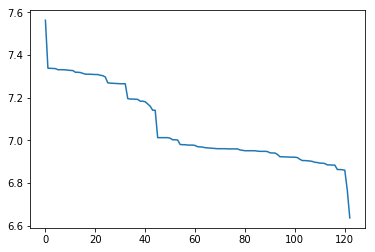

count    123.000000
mean       7.062444
std        0.176443
min        6.637258
25%        6.941190
50%        6.970730
75%        7.265430
max        7.562681
dtype: float64



In [20]:
perform_analysis_on(393, 535, 'Frontend (WCA) and IFProc loading')

### Probable good example of outlier detection

--- just 6% of the cases. 4 delay/case ---

C_524: [CONTROL/${ANT}/FrontEnd/LPR - setCntlOptSwitchPort] EDFA voltage set to ${N} when changing from band ${N} to ${N}

C_393: [CONTROL/${ANT}/FrontEnd/WCA${N} - SetFrequency] WCA Frequency set to: ${N}

[10331, 10330, 10330, 245, 183, 178, 176, 165, 155, 154, 154, 148, 145, 141, 139, 137, 137, 136, 134, 132, 129, 129, 128, 127, 127, 126, 125, 125, 124, 124, 124, 124, 124, 123, 123, 123, 123, 123, 122, 122, 121, 121, 120, 119, 118, 118, 117, 117, 117, 116] ... (430 ommited) ... [107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 106, 106, 106, 106, 106, 106, 57, 57]

1) Raw serie:


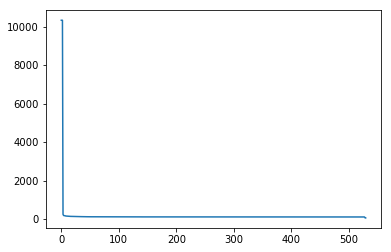

count      530.000000
mean       169.124528
std        767.456056
min         57.000000
25%        108.000000
50%        109.000000
75%        111.000000
max      10331.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


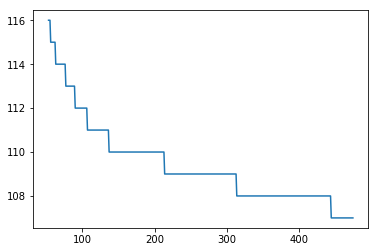

count    423.000000
mean     109.425532
std        1.876144
min      107.000000
25%      108.000000
50%      109.000000
75%      110.000000
max      116.000000
dtype: float64

3) Log on time graph of the serie


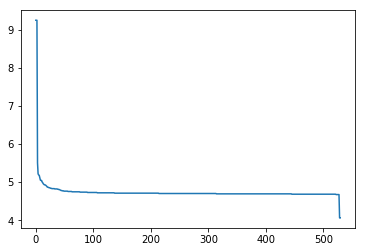

count    530.000000
mean       4.742872
std        0.349951
min        4.060443
25%        4.691348
50%        4.700480
75%        4.718499
max        9.243001
dtype: float64



In [21]:
perform_analysis_on(524, 393, 'just 6% of the cases. 4 delay/case')

### Perfect for stability, however a little head of 28s appears

--- (59%) ---

C_543: [CONTROL/${ANT}/FrontEnd/ACD - void ACDImpl::setCalibrationDeviceBandInternal(CalibrationDeviceMod::CalibrationDevice, ReceiverBandMod::ReceiverBand)] Setting Ambient load in front of band ${N}

C_544: [CONTROL/${ANT}/FrontEnd/ACD - void ACDImpl::setCalibrationDeviceBandInternal(CalibrationDeviceMod::CalibrationDevice, ReceiverBandMod::ReceiverBand)] Setting Hot load in front of band ${N}

[28806, 28806, 28806, 28805, 28804, 28803, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28802, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28801, 28800, 28800, 28800, 28800, 28800, 28800, 28800, 28800, 28800, 28800, 28799, 28799] ... (5481 ommited) ... [6013, 6013, 6012, 6012, 6012, 6009, 6008, 6008, 5982, 5974, 5959, 4898, 4898, 4897, 4897, 4897, 4897, 4896, 4896, 4896, 4896, 4896, 4896, 4896, 4896, 4891, 4891, 4327, 4322, 4322, 4322, 4321, 4321, 4321, 4321, 

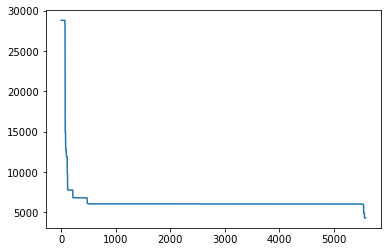

count     5581.000000
mean      6440.417667
std       2598.180815
min       4319.000000
25%       6047.000000
50%       6048.000000
75%       6050.000000
max      28806.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


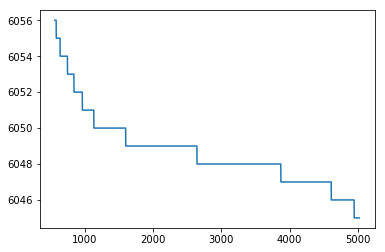

count    4464.000000
mean     6048.674955
std         1.974936
min      6045.000000
25%      6047.000000
50%      6048.000000
75%      6049.000000
max      6056.000000
dtype: float64

3) Log on time graph of the serie


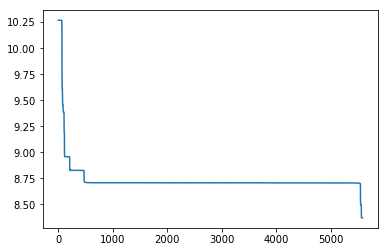

count    5581.000000
mean        8.741008
std         0.189708
min         8.371011
25%         8.707483
50%         8.707648
75%         8.707979
max        10.268374
dtype: float64



In [22]:
perform_analysis_on(543, 544, '(59%)')